# **Mielage prediction**

# Source

The dataset was taken from statlib library  which is maintained as carnegia mellon university. The dataset was used in the 1983
American statistician association exposition

# Dataset Information:
This dataset is slightly modified version of the datset provided in the statlib library. In line with the use of ros quinlan in predicting the attribute,"mpg",8 of the orginal instance were removed because they had unknown value for mpg attribute the original dataset is available in the file "auto-mpg.data-original".

"This data concern city cycle fuel consumption in miles per gallon,to be predicted in terms of three multivalued discrete and 5 continous attribute"

# Attribute Information:



1. mpg: continuous


2. cylinders: multi-valued discrete

3. displacement: continuous


4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

## **Objective**

## **Import Library**

In [2]:
import pandas as pd

C:\Users\91992\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

## **Import Data**

In [6]:
df = pd.read_csv("MPG.csv")

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## **Data Preprocessing**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## **Describe Data**

In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
df.iloc[:,0:6].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


# Remove missing values 

In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## **Data Visualization**

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


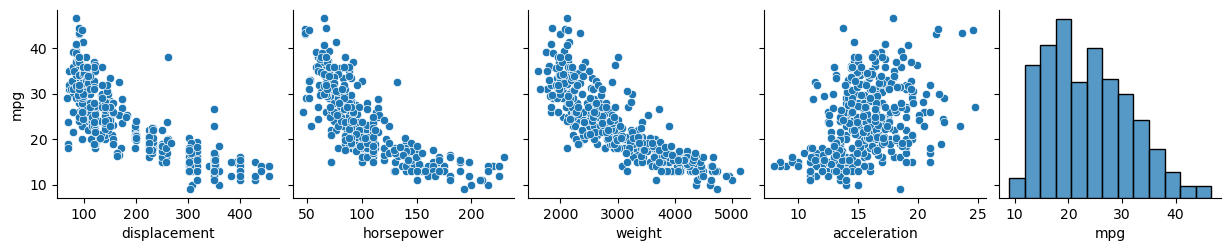

In [14]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

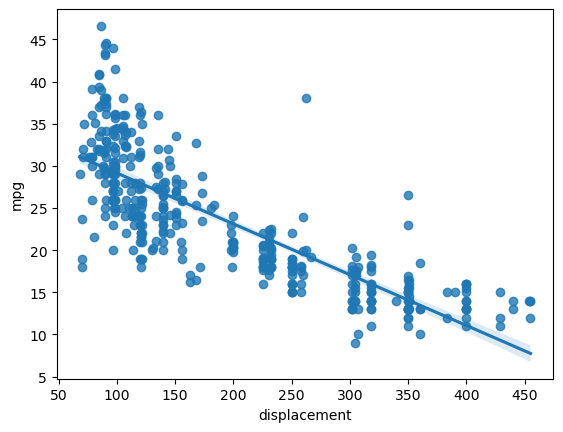

In [15]:
sns.regplot(df,x='displacement', y='mpg')

## **Define Target Variable (y) and Feature Variables (X)**

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [17]:
y=df['mpg']

In [18]:
y.shape

(398,)

In [19]:
X=df[['displacement','horsepower','weight','acceleration']]

In [20]:
X.shape

(398, 4)

In [21]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


#  Scaling data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss= StandardScaler()

In [24]:
ss.fit_transform(X)

array([[ 1.0906037 ,  0.66413273,  0.63086987, -1.29549834],
       [ 1.5035143 ,  1.57459447,  0.85433297, -1.47703779],
       [ 1.19623199,  1.18439658,  0.55047045, -1.65857724],
       ...,
       [-0.56103873, -0.53247413, -0.79858454, -1.4407299 ],
       [-0.70507731, -0.66254009, -0.40841088,  1.10082237],
       [-0.71467988, -0.58450051, -0.29608816,  1.39128549]])

In [25]:
pd.DataFrame(X).describe()

,displacement,horsepower,weight,acceleration
count,398.000000,392.000000,398.000000,398.000000
mean,193.425879,104.469388,2970.424623,15.568090
std,104.269838,38.491160,846.841774,2.757689
min,68.000000,46.000000,1613.000000,8.000000
25%,104.250000,75.000000,2223.750000,13.825000
50%,148.500000,93.500000,2803.500000,15.500000
75%,262.000000,126.000000,3608.000000,17.175000
max,455.000000,230.000000,5140.000000,24.800000


after standardization mean is zero and standard deviation is one

## **Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=2529)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 4), (80, 4), (318,), (80,))

In [105]:
X_train.isna().sum()

displacement    0
horsepower      5
weight          0
acceleration    0
dtype: int64

In [106]:
X_train['horsepower'] = np.where(X_train['horsepower'].isna(),
                                 X_train['horsepower'].mean(),
                                 X_train['horsepower'])


In [107]:
X_test['horsepower'] = np.where(X_test['horsepower'].isna(),
                                 X_test['horsepower'].mean(),
                                 X_test['horsepower'])

In [108]:
X_train

,displacement,horsepower,weight,acceleration
221,305.0,145.0,3880,12.5
370,112.0,85.0,2575,16.2
277,163.0,133.0,3410,15.8
27,318.0,210.0,4382,13.5
76,121.0,112.0,2933,14.5
...,...,...,...,...
72,304.0,150.0,3892,12.5
228,250.0,98.0,3525,19.0
316,225.0,90.0,3381,18.7
50,116.0,90.0,2123,14.0


In [109]:
y_train

221    17.5
370    31.0
277    16.2
27     11.0
76     18.0
       ... 
72     15.0
228    18.5
316    19.1
50     28.0
352    29.9
Name: mpg, Length: 318, dtype: float64

## **Modeling**

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()

In [112]:
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
lr.intercept_

44.25442368570744

In [114]:
lr.coef_

array([-0.00071671, -0.03778318, -0.00606666,  0.08941659])

# Predict test data 

In [115]:
y_pred = lr.predict(X_test)

In [116]:
y_pred

array([15.63671024, 31.19975178, 19.24038709, 24.32466077, 32.86183882,
       29.59538094, 25.49267465, 12.55800617,  9.01264533, 28.88863093,
       30.73931042, 21.03736802, 31.86611678, 14.92334297, 20.62786844,
       15.2099186 , 24.72223591, 32.0231744 , 14.48053748, 11.0264283 ,
       18.4975879 , 30.65375282, 26.59695281, 18.93801934, 20.3439509 ,
       26.63573969, 33.14760434, 30.53679455,  9.47632141, 25.76291099,
        8.07365741, 27.02315042, 30.76769418, 22.41184475, 17.59957253,
       21.34494867,  9.6911847 , 22.51201929, 31.24236818, 33.70668775,
       24.74675926, 31.25123521, 27.26809287, 17.91866923, 22.75166278,
       23.76965596, 20.64865991, 29.37453885, 24.062261  , 24.55233968,
       27.36610114, 12.84089704, 23.15105377, 32.69167341, 19.25468686,
       14.12877998, 30.76504435, 27.13643293, 21.48699002, 29.82334514,
       23.76813691, 31.86818303, 24.08419169,  8.14696546, 31.92616633,
       20.03090206, 27.24616832, 21.72741451, 11.30242486, 28.73

## **Model Evaluation**

In [71]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [72]:
mean_absolute_error(y_test,y_pred)

3.671265496109542

In [73]:
mean_absolute_percentage_error(y_test,y_pred)

0.16671002854700637

In [74]:
r2_score(y_test,y_pred)

0.6692838813027211

# Polynomial regression

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [88]:
mlr=LinearRegression()

In [89]:
X_train2=poly.fit_transform(X_train)

In [90]:
X_test2 = poly.fit_transform(X_test)

In [92]:
mlr.fit(X_train2,y_train)

LinearRegression()

In [94]:
mlr.intercept_

72.65166079837968

In [95]:
mlr.coef_

array([-4.68165778e-02, -1.14340837e-01, -1.49970848e-02, -7.00625291e-01,
        1.88128021e-04,  1.22430441e-05, -1.67518794e-03,  1.61538195e-05,
       -4.57856714e-03,  4.70605459e-04])

In [97]:
y_pred_poly = mlr.predict(X_test2)

In [98]:
mean_absolute_error(y_test, y_pred)

3.671265496109542

In [99]:
mean_absolute_percentage_error(y_test, y_pred)

0.16671002854700637

In [100]:
r2_score(y_test, y_pred)

0.6692838813027211

In [101]:
X_train2

array([[3.05000e+02, 1.45000e+02, 3.88000e+03, ..., 5.62600e+05,
        1.81250e+03, 4.85000e+04],
       [1.12000e+02, 8.50000e+01, 2.57500e+03, ..., 2.18875e+05,
        1.37700e+03, 4.17150e+04],
       [1.63000e+02, 1.33000e+02, 3.41000e+03, ..., 4.53530e+05,
        2.10140e+03, 5.38780e+04],
       ...,
       [2.25000e+02, 9.00000e+01, 3.38100e+03, ..., 3.04290e+05,
        1.68300e+03, 6.32247e+04],
       [1.16000e+02, 9.00000e+01, 2.12300e+03, ..., 1.91070e+05,
        1.26000e+03, 2.97220e+04],
       [9.80000e+01, 6.50000e+01, 2.38000e+03, ..., 1.54700e+05,
        1.34550e+03, 4.92660e+04]])

## **Prediction**

In [117]:
def predict(horsepower, weight, displacement, acceleration):
    # Convert input data to numpy array and reshape for a single prediction
    input_data = np.array([horsepower, weight, displacement, acceleration]).reshape(1, -1)
    prediction = lr.predict(input_data)
    return prediction[0]  # Return the single predicted value

# Example usage with specific values for each feature
output = predict(307.0, 130, 3504, 12)
print("Predicted output:", output)

Predicted output: 18.938019337671733


C:\Users\91992\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Explaination**

Dataset Information and Attributes
Source: StatLib library, Carnegie Mellon University. The dataset originally featured in the 1983 American Statistical Association exposition.
Target: mpg (miles per gallon)
Attributes:
Continuous: mpg, displacement, horsepower, weight, acceleration
Discrete (multi-valued): cylinders, model year, origin
Categorical: car name

Steps Undertaken
1. Importing Libraries
2. Data Import and Initial Exploration
Loaded dataset into a DataFrame and viewed basic stats.
df.nunique() and df.describe() were used to explore data distributions.
3. Data Preprocessing
Checked data types and missing values with df.info() and df.isna().sum().
Found missing values in the horsepower column, which were later filled using the column's mean.
4. Data Visualization
Pair plots and regression plots (Seaborn) were generated to explore relationships with the target variable, mpg.
5. Feature Selection and Scaling
Selected features ['displacement', 'horsepower', 'weight', 'acceleration'] as X and mpg as y.
Standardized X using StandardScaler for improved model performance.
6. Train-Test Split
Split data into 80% training and 20% testing subsets.
Addressed missing values in X_train and X_test by replacing NaNs in horsepower with the column mean.
7. Modeling - Linear Regression
Fitted a linear regression model on the training data.
Evaluated model performance on the test data using:
Mean Absolute Error (MAE): 3.67
Mean Absolute Percentage Error (MAPE): 16.67%
R-squared (R²): 0.669 (indicating 66.9% variance explained by the model)
8. Modeling - Polynomial Regression
Used a polynomial regression model with degree 2 for interaction terms.
Applied transformations on training and test sets using PolynomialFeatures.
Fitted the polynomial model to improve performance compared to the linear model.
